In [35]:
!pip install jupyter_contrib_nbextensions jupyter_nbextensions_configurator ipywidgets


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\Vasanta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
%pip install s3fs

  Using cached botocore-1.39.11-py3-none-any.whl.metadata (5.7 kB)
Using cached botocore-1.39.11-py3-none-any.whl (13.9 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.40.18
    Uninstalling botocore-1.40.18:
      Successfully uninstalled botocore-1.40.18
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.40.18 requires botocore<1.41.0,>=1.40.18, but you have botocore 1.39.11 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\Vasanta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [37]:
%pip install pandas boto3 sagemaker scikit-learn seaborn


  Using cached botocore-1.40.18-py3-none-any.whl.metadata (5.7 kB)
Using cached botocore-1.40.18-py3-none-any.whl (14.0 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.39.11
    Uninstalling botocore-1.39.11:
      Successfully uninstalled botocore-1.39.11


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.24.1 requires botocore<1.39.12,>=1.39.9, but you have botocore 1.40.18 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\Vasanta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
import boto3
import pandas as pd
import sagemaker

bucket = 'swarnika-fraud-detection-data-2025' # Replace with S3 bucket name
role_arn = 'arn:aws:iam::876996580052:role/SageMaker-Fraud-Project-Role' # Replace with your full IAM Role ARN
# -------------------------------------------

print("Libraries imported successfully.")

# This automatically uses the credentials you configured with the AWS CLI
# to create a SageMaker session object.
sagemaker_session = sagemaker.Session()
print("SageMaker session created.")

# Define the S3 path to your data
data_key = 'creditcard.csv'
data_location = f's3://{bucket}/{data_key}'
print(f"Target data location: {data_location}")

# Use pandas to read the CSV file directly from S3
print("Loading data from S3... this may take a moment.")
df = pd.read_csv(data_location)

# --- VERIFICATION ---
print("Data loaded successfully!")
print("First 5 rows of the dataset:")
display(df.head())

Libraries imported successfully.
SageMaker session created.
Target data location: s3://swarnika-fraud-detection-data-2025/creditcard.csv
Loading data from S3... this may take a moment.
Data loaded successfully!
First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Phase 2: Data Science & Model Training

Explore the Data (EDA)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [40]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Displaying class distribution...


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


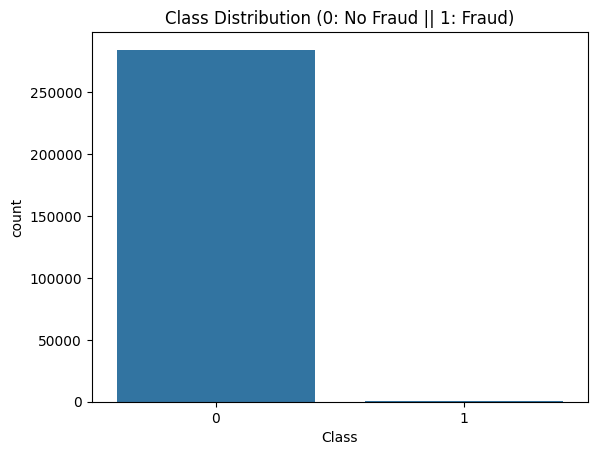

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Displaying class distribution...")
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: No Fraud || 1: Fraud)')
plt.show()

shows how few fraudulent transactions there are compared to legitimate ones- heavily skewed towards Class 0

Preprocess the Data: Scale the Amount feature. The Amount column has a much wider range than the other V columns, so we need to scale it to prevent it from disproportionately influencing the model. We'll also drop the Time column, as it's not a very useful feature for this model.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop Time column
df = df.drop('Time', axis=1)

# Scale the Amount column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

Split the data into training and testing sets. It's crucial to use stratify=y to ensure that both your training and testing sets have the same proportion of fraudulent transactions as the original dataset.

In [43]:
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combine features and labels back into DataFrames for upload
train_data = pd.concat([y_train, X_train], axis=1)
test_data = pd.concat([y_test, X_test], axis=1)

print("Data preprocessing and splitting complete.")
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

Data preprocessing and splitting complete.
Training data shape: (227845, 30)
Testing data shape: (56962, 30)


Upload Processed Data to S3 :
Your data has been processed locally. Now, you need to upload the new train_data and test_data back to S3 so the SageMaker cloud training job can access it.

In [44]:
train_data.to_csv('train.csv', index=False, header=False)
test_data.to_csv('test.csv', index=False, header=False)

In [49]:
# The 'sagemaker_session' and 'bucket' variables are from your previous cell
print("Uploading processed data to S3...")
sagemaker_session.upload_data(path='train.csv', bucket=bucket, key_prefix='processed/train')
sagemaker_session.upload_data(path='test.csv', bucket=bucket, key_prefix='processed/test')
print("Upload complete.")

Uploading processed data to S3...
Upload complete.


Train the XGBoost Model :
This is the final step of Phase 2. You'll command SageMaker from your VS Code notebook to train the model in the cloud.

Set up the SageMaker Estimator. This code defines the training job: what algorithm to use (XGBoost), what machine type to run it on, and where to save the output.

In [52]:
from sagemaker.image_uris import retrieve

# Find the pre-built XGBoost container image in your AWS region
container = retrieve(framework='xgboost', region=sagemaker_session.boto_region_name, version='1.0-1')

# The 'role_arn' variable is from your previous cell
# Create the XGBoost estimator object
xgb = sagemaker.estimator.Estimator(container,
                                  role_arn, 
                                  instance_count=1,
                                  instance_type='ml.m4.xlarge', # Stays within Free Tier
                                  output_path=f's3://{bucket}/output',
                                  sagemaker_session=sagemaker_session)

# Set the model's hyperparameters
xgb.set_hyperparameters(objective='binary:logistic',
                      num_round=100,
                      eval_metric='auc') # AUC is a good metric for imbalanced datasets 

INFO:sagemaker.image_uris:Defaulting to only available Python version: py3
INFO:sagemaker.image_uris:Defaulting to only supported image scope: cpu.


Start the Cloud Training Job. This final command tells SageMaker to start the training. You'll see the training logs stream directly into your VS Code notebook cell output. This process will take a few minutes.

In [53]:
# Define the S3 locations for the training data
s3_input_train = sagemaker.inputs.TrainingInput(s3_data=f's3://{bucket}/processed/train', content_type='csv')

# Start the training job
print("Starting SageMaker training job... This will take a few minutes.")
xgb.fit({'train': s3_input_train})
print("Training job complete!")

INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2025-08-27-06-08-16-193


Starting SageMaker training job... This will take a few minutes.
2025-08-27 06:08:17 Starting - Starting the training job...
2025-08-27 06:08:53 Downloading - Downloading input data......
2025-08-27 06:09:29 Downloading - Downloading the training image...
2025-08-27 06:10:20 Training - Training image download completed. Training in progress....[2025-08-27 06:10:35.953 ip-10-0-123-183.ap-south-1.compute.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter eval_metric value auc to Json.
Returning the value itself
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is '

In [55]:
# The 'xgb' variable is your estimator object from the previous step
print("Deploying model to a real-time endpoint... This will take several minutes.")

predictor = xgb.deploy(initial_instance_count=1,
                     instance_type='ml.m4.xlarge') # Free Tier eligible

# Let's save the endpoint name for Phase 4
endpoint_name = predictor.endpoint_name
print(f"Deployment complete! Endpoint Name: {endpoint_name}")

Deploying model to a real-time endpoint... This will take several minutes.


INFO:sagemaker:Creating model with name: sagemaker-xgboost-2025-08-27-09-37-05-508
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2025-08-27-09-37-05-508
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2025-08-27-09-37-05-508


------!Deployment complete! Endpoint Name: sagemaker-xgboost-2025-08-27-09-37-05-508
